In [6]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

def plot_histogram(file_s, file_b, label_s, label_b):
    s = h5py.File(file_s, "r")
    b = h5py.File(file_b, "r")

    smavg = np.array(s["pred_ptetaphim_max"][:,:,-1].mean(-1))
    bmavg = np.array(b["pred_ptetaphim_max"][:,:,-1].mean(-1))

    bins = np.linspace(0, 3500, 36)
    density = True

    plt.hist(bmavg, density=density, bins=bins, histtype="step", color="black", label=label_b)
    plt.hist(smavg, density=density, bins=bins, histtype="step", color="blue", label=label_s)

    mean_blue, sigma_blue = np.mean(smavg), np.std(smavg)
    mean_black, sigma_black = np.mean(bmavg), np.std(bmavg)
    
    s.close()
    b.close()

    return (mean_blue, sigma_blue), (mean_black, sigma_black)




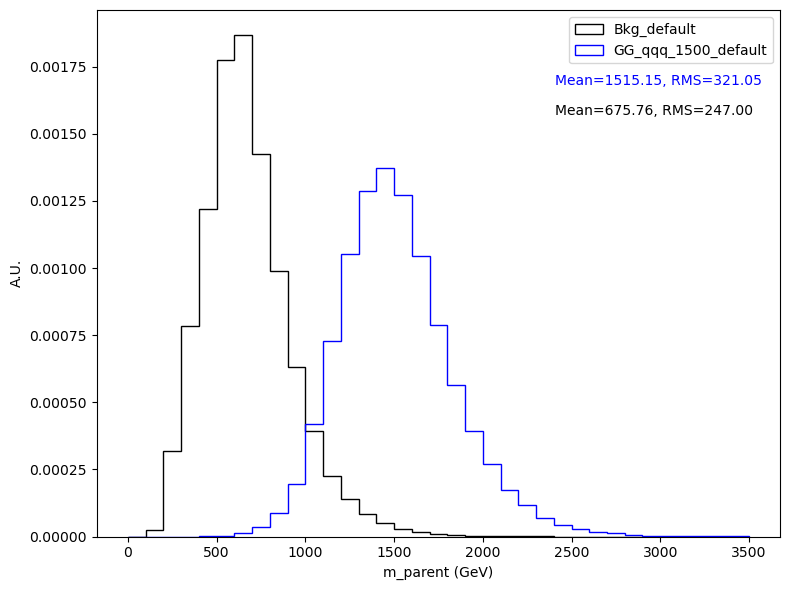

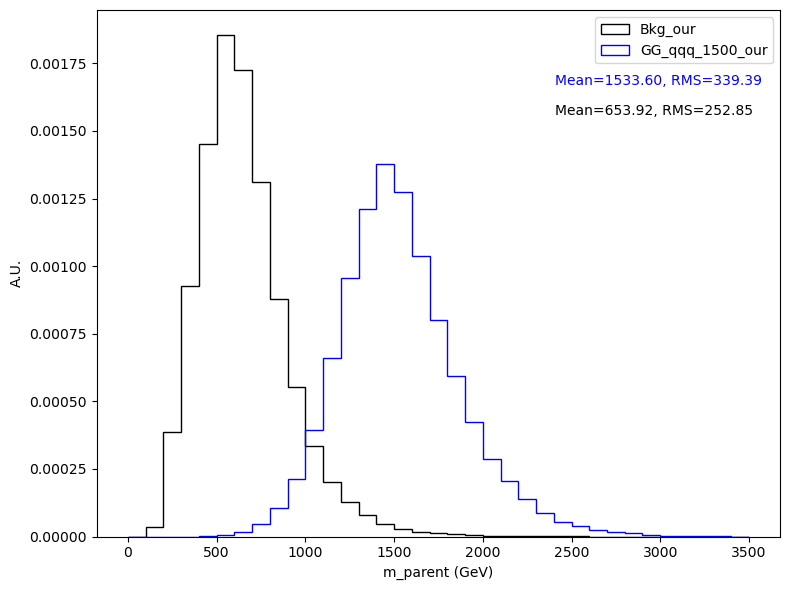

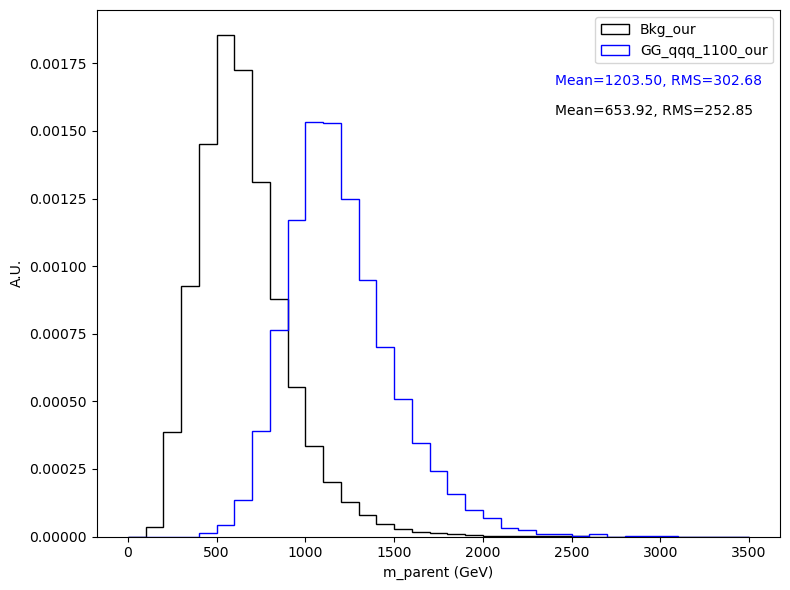

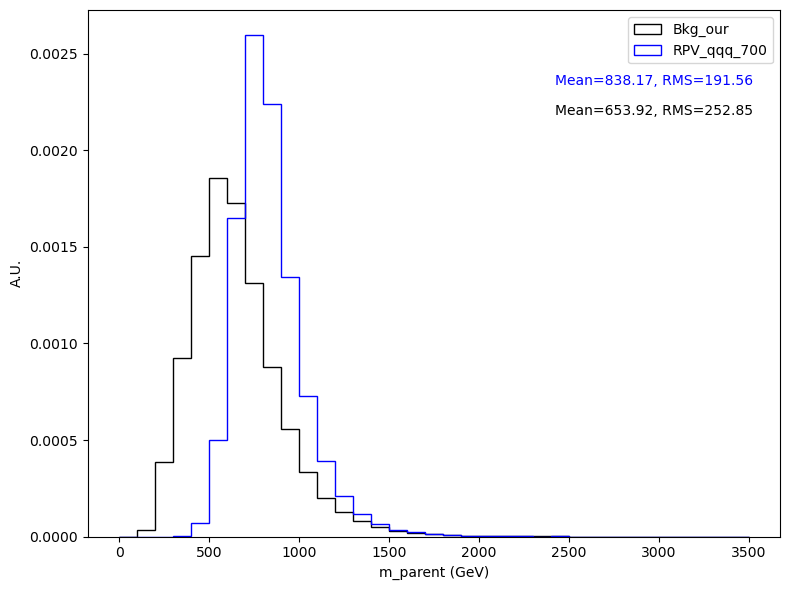

In [7]:
plots_info = [
    ("evaluate/GG_qqq_1500_transformer_classifier.h5", "evaluate/Bkg.sampled_200k_transformer_classifier.h5", "GG_qqq_1500_default", "Bkg_default"),
    ("evaluate/GG_qqq_1500_transformer_classifier_our.h5", "evaluate/Bkg.sampled_200k_transformer_classifier_our.h5", "GG_qqq_1500_our", "Bkg_our"),
    ("evaluate/GG_qqq_1100.sampled_10k_transformer_classifier_our.h5", "evaluate/Bkg.sampled_200k_transformer_classifier_our.h5", "GG_qqq_1100_our", "Bkg_our"),
    ("evaluate/signal700_transformer_classifier_our.h5", "evaluate/Bkg.sampled_200k_transformer_classifier_our.h5", "RPV_qqq_700", "Bkg_our")
]

for file_s, file_b, label_s, label_b in plots_info:
    plt.figure(figsize=(8, 6))  # Adjust figure size if necessary
    (mean_blue, sigma_blue), (mean_black, sigma_black) = plot_histogram(file_s, file_b, label_s, label_b)
    plt.legend()
    plt.xlabel('m_parent (GeV)')
    #plt.yscale('log')
    plt.ylabel('A.U.') 
    plt.figtext(0.7, 0.85, f'Mean={mean_blue:.2f}, RMS={sigma_blue:.2f}', color='blue')
    plt.figtext(0.7, 0.8, f'Mean={mean_black:.2f}, RMS={sigma_black:.2f}', color='black')
    plt.tight_layout()
    plt.savefig(f'{label_s}_{label_b}.png') 
    plt.show()


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import h5py

def plot_histograms(file_s_list, file_b, label_s_list, label_b):
    plt.figure(figsize=(8, 6))  # Adjust figure size if necessary
    density = True
    bins = np.linspace(0, 3500, 36)

    all_means_blue = []
    all_stds_blue = []
    all_means_black = []
    all_stds_black = []

    colors = plt.cm.get_cmap('tab10', len(file_s_list) + 1)

    for i, (file_s, label_s) in enumerate(zip(file_s_list, label_s_list)):
        s = h5py.File(file_s, "r")
        smavg = np.array(s["pred_ptetaphim_max"][:,:,-1].mean(-1))
        plt.hist(smavg, density=density, bins=bins, histtype="step", label=label_s, color=colors(i))
        s.close()
        mean_blue, std_blue = np.mean(smavg), np.std(smavg)
        all_means_blue.append(mean_blue)
        all_stds_blue.append(std_blue)

    b = h5py.File(file_b, "r")
    bmavg = np.array(b["pred_ptetaphim_max"][:,:,-1].mean(-1))
    plt.hist(bmavg, density=density, bins=bins, histtype="step", color="black", label=label_b)
    b.close()
    mean_black, std_black = np.mean(bmavg), np.std(bmavg)
    all_means_black.append(mean_black)
    all_stds_black.append(std_black)

    return (all_means_blue, all_stds_blue), (all_means_black, all_stds_black)



/tmp/ipykernel_28717/3518184944.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(file_s_list) + 1)


<Figure size 800x600 with 0 Axes>

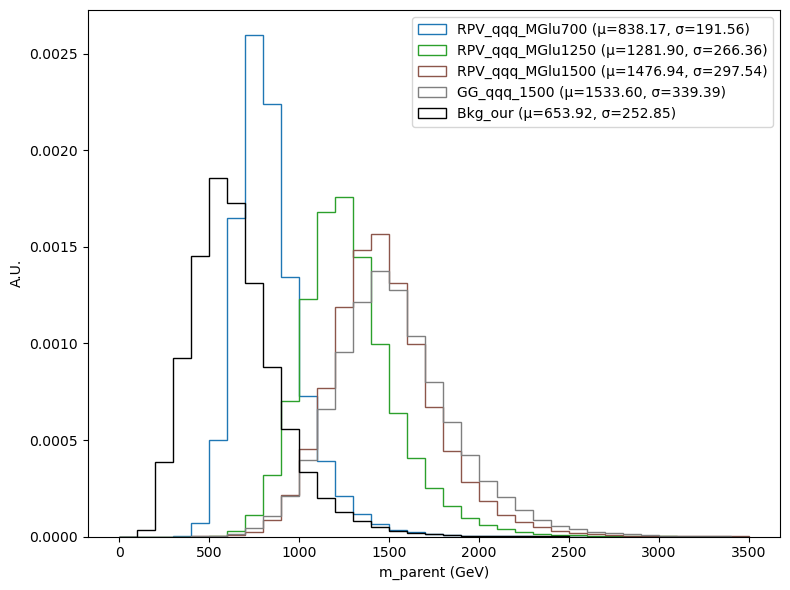

In [9]:
plots_info = [
    (["evaluate/signal700_transformer_classifier_our.h5","evaluate/signal1250_transformer_classifier_our.h5","evaluate/signal1500_transformer_classifier_our.h5","evaluate/GG_qqq_1500_transformer_classifier_our.h5"], "evaluate/Bkg.sampled_200k_transformer_classifier_our.h5", ["RPV_qqq_MGlu700","RPV_qqq_MGlu1250","RPV_qqq_MGlu1500","GG_qqq_1500"], "Bkg_our")
]

plt.figure(figsize=(8, 6)) 

for file_s_list, file_b, label_s_list, label_b in plots_info:
    (all_means_blue, all_stds_blue), (all_means_black, all_stds_black) = plot_histograms(file_s_list, file_b, label_s_list, label_b)
    plt.legend()
    plt.xlabel('m_parent (GeV)')
    plt.ylabel('A.U.') 

    legend_labels = label_s_list + [label_b]
    legend_labels = [f'{label} (μ={mean:.2f}, σ={std:.2f})' for label, mean, std in zip(legend_labels, all_means_blue + all_means_black, all_stds_blue + all_stds_black)]
    plt.legend(labels=legend_labels)

    plt.tight_layout()
    plt.savefig(f'{"_".join(label_s_list)}_{label_b}.png') 
    plt.show()


/tmp/ipykernel_28717/3518184944.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(file_s_list) + 1)


<Figure size 800x600 with 0 Axes>

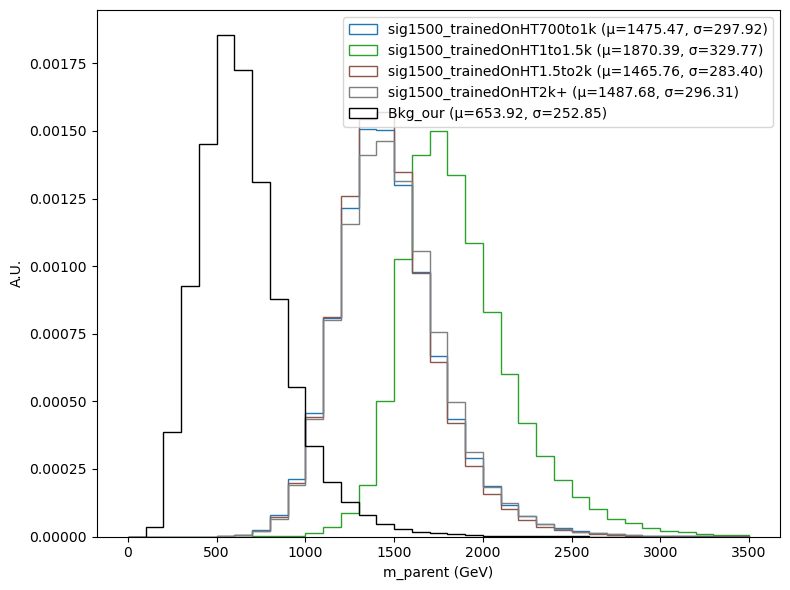

In [11]:
plots_info = [
    (["evaluate/signal1500_training_2024.02.23.12.20.04.h5","evaluate/signal1500_training_2024.02.23.12.29.42.h5","evaluate/signal1500_training_2024.02.23.12.43.32.h5","evaluate/signal1500_training_2024.02.23.12.55.30.h5"], "evaluate/Bkg.sampled_200k_transformer_classifier_our.h5", ['sig1500_trainedOnHT700to1k','sig1500_trainedOnHT1to1.5k','sig1500_trainedOnHT1.5to2k','sig1500_trainedOnHT2k+'], "Bkg_our")
]

plt.figure(figsize=(8, 6))  # Adjust figure size if necessary

for file_s_list, file_b, label_s_list, label_b in plots_info:
    (all_means_blue, all_stds_blue), (all_means_black, all_stds_black) = plot_histograms(file_s_list, file_b, label_s_list, label_b)
    plt.legend()
    plt.xlabel('m_parent (GeV)')
    plt.ylabel('A.U.') 

    # Adding mean and std to the legend with the same color as the histogram
    legend_labels = label_s_list + [label_b]
    legend_labels = [f'{label} (μ={mean:.2f}, σ={std:.2f})' for label, mean, std in zip(legend_labels, all_means_blue + all_means_black, all_stds_blue + all_stds_black)]
    plt.legend(labels=legend_labels)

    plt.tight_layout()
    plt.savefig(f'{"_".join(label_s_list)}_{label_b}.png') 
    plt.show()

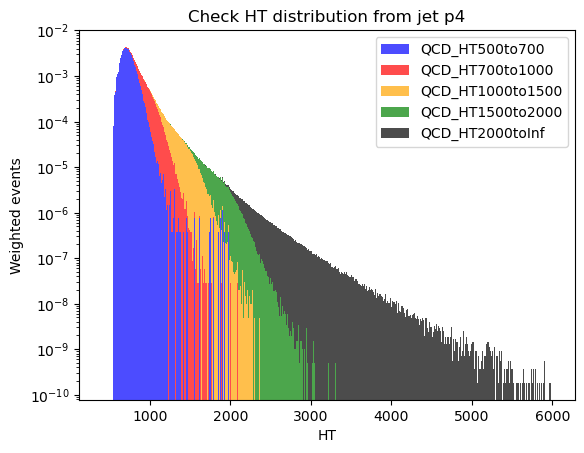

(379489,) (1114764,) (1047875,) (1186122,) (675778,)


In [6]:
# Check xsec weights by plotting HT 
import h5py, numpy as np
import matplotlib.pyplot as plt

# Open the h5 files
#with h5py.File('QCD_HT_h5s/combined_out_QCD_HT700to1000.h5', 'r') as file1, h5py.File('QCD_HT_h5s/combined_out_QCD_HT1000to1500.h5', 'r') as file2, h5py.File('QCD_HT_h5s/combined_out_QCD_HT1500to2000.h5', 'r') as file3, h5py.File('QCD_HT_h5s/combined_out_QCD_HT2000toInf.h5', 'r') as file4:
with h5py.File('../slimmed_ntuples/combined_QCD_new_HT500to700_100k.h5', 'r') as file0, \
    h5py.File('../slimmed_ntuples/combined_QCD_new_HT700to1000_100k.h5', 'r') as file1, \
    h5py.File('../slimmed_ntuples/combined_QCD_new_HT1000to1500_100k.h5', 'r') as file2, \
    h5py.File('../slimmed_ntuples/combined_QCD_new_HT1500to2000_100k.h5', 'r') as file3, \
    h5py.File('../slimmed_ntuples/combined_QCD_new_HT2000toInf_100k.h5', 'r') as file4:

    # Access the dataset from each file
    data0 = file0['source']['pt']  
    data1 = file1['source']['pt']  
    data2 = file2['source']['pt'] 
    data3 = file3['source']['pt'] 
    data4 = file4['source']['pt'] 

    data0_HT = np.sum(data0, axis=1)
    data1_HT = np.sum(data1, axis=1)
    data2_HT = np.sum(data2, axis=1)
    data3_HT = np.sum(data3, axis=1)
    data4_HT = np.sum(data4, axis=1)

    x_sections = {'QCD_HT300to500': 0,
            'QCD_HT500to700': 29370,
            'QCD_HT700to1000': 6524,
            'QCD_HT1000to1500': 1064,
            'QCD_HT1500to2000': 121.5,
            'QCD_HT2000toInf': 25.42
            }
    
    weights0 = np.full_like(data0_HT, x_sections['QCD_HT500to700'] / len(data0_HT))
    weights1 = np.full_like(data1_HT, x_sections['QCD_HT700to1000'] / len(data1_HT))
    weights2 = np.full_like(data2_HT, x_sections['QCD_HT1000to1500'] / len(data2_HT))
    weights3 = np.full_like(data3_HT, x_sections['QCD_HT1500to2000'] / len(data3_HT))
    weights4 = np.full_like(data4_HT, x_sections['QCD_HT2000toInf'] / len(data4_HT))


    plt.hist([data0_HT, data1_HT, data2_HT, data3_HT, data4_HT], bins=1000, range=(400, 6000), 
        color=['blue','red', 'orange', 'green', 'black'], alpha=0.7, 
        label=['QCD_HT500to700', 'QCD_HT700to1000', 'QCD_HT1000to1500', 'QCD_HT1500to2000', 'QCD_HT2000toInf'], 
        #weights=[np.full_like(data0_HT, 0.013139), np.full_like(data1_HT, 0.00466), np.full_like(data2_HT, 0.00269), np.full_like(data3_HT, 0.00040), np.full_like(data4_HT, 0.00017)], 
        weights=[weights0, weights1, weights2, weights3, weights4],
        density=True, stacked=True)

    # Add labels, title, and legend
    plt.xlabel('HT')
    plt.ylabel('Weighted events')
    plt.yscale('log')
    plt.title('Check HT distribution from jet p4')
    plt.legend()

    #Display the plot
    plt.show()

print(data0_HT.shape, data1_HT.shape, data2_HT.shape, data3_HT.shape, data4_HT.shape)